In [1]:
import pandas as pd
import sklearn as sk
from sklearn.neighbors import KNeighborsRegressor


In [2]:
k_list = range(1, 457)
k_MSE_tuples = []

df = pd.read_csv(r'E:\Python\Machine Learning\datasets\boston.csv')

print(df.shape)
df.head()

(506, 14)


,crime_rate,proportion_res_land,proportion_business,"river""",NO,avg_rooms,proportion_units,distance,accessibility,property_tax,pupil_teacher_ratio,proportion_blacks,lower_status,value
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.describe()

,crime_rate,proportion_res_land,proportion_business,"river""",NO,avg_rooms,proportion_units,distance,accessibility,property_tax,pupil_teacher_ratio,proportion_blacks,lower_status,value
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
cols = df.columns.tolist()
cols

['crime_rate',
 'proportion_res_land',
 'proportion_business',
 'river"',
 'NO',
 'avg_rooms',
 'proportion_units',
 'distance',
 'accessibility',
 'property_tax',
 'pupil_teacher_ratio',
 'proportion_blacks',
 'lower_status',
 'value']

In [5]:
X = df[cols[:-1]]
y = df[cols[-1]]

X_train = X.iloc[:(len(df)-50),]
y_train = y.iloc[:(len(df)-50),]

X_test = X.iloc[(len(df)-50):,]
y_test = y.iloc[(len(df)-50):,]
#E:\Python\Machine Learning\datasets
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(456, 13) (456,) (50, 13) (50,)


In [6]:
for k in k_list:
    algo = KNeighborsRegressor(n_neighbors=k)
    algo.fit(X_train, y_train)
    predictions = algo.predict(X_test)
    MSE = sk.metrics.mean_squared_error(y_test, predictions)
    k_MSE_tuples.append((k, MSE))

In [7]:
k_MSE_tuples

[(1, 29.299199999999992),
 (2, 24.532349999999994),
 (3, 22.003244444444434),
 (4, 25.753774999999997),
 (5, 26.199511999999995),
 (6, 24.440900000000003),
 (7, 24.614844897959188),
 (8, 22.819918750000003),
 (9, 24.265634567901234),
 (10, 22.466314),
 (11, 23.035611570247937),
 (12, 24.952604166666674),
 (13, 23.773740828402374),
 (14, 24.387815306122455),
 (15, 27.16195644444445),
 (16, 25.310738281249996),
 (17, 24.742864359861592),
 (18, 25.761079629629627),
 (19, 27.536523545706363),
 (20, 27.362319),
 (21, 27.636767346938765),
 (22, 29.08414545454545),
 (23, 30.72338071833648),
 (24, 30.59721354166666),
 (25, 30.55123424),
 (26, 31.484486390532542),
 (27, 32.280383813443066),
 (28, 33.466578826530615),
 (29, 33.51196837098692),
 (30, 33.53000133333333),
 (31, 32.78647221644121),
 (32, 32.042155859375),
 (33, 31.766151515151513),
 (34, 30.539863840830446),
 (35, 30.5083386122449),
 (36, 30.227788580246916),
 (37, 30.199297297297303),
 (38, 29.615180332409977),
 (39, 28.64333767258

In [8]:
MSE_DF= pd.DataFrame(k_MSE_tuples)

In [15]:
MSE_DF.reset_index(inplace = True)

In [18]:
import numpy as np

In [22]:
MSE_DF.iloc[np.where(MSE_DF[1]<=min(MSE_DF[1]))]

,0,1
113,114,18.063113


In [10]:
MSE_DF.set_index(0, inplace=True)

In [12]:
#MSE_DF

In [13]:
MSE_DF.sort_values(by=1).head(10)

,1
0,
114,18.063113
111,18.073259
113,18.121133
115,18.122068
112,18.139936
110,18.146838
116,18.211119
137,18.252681
138,18.257880


<AxesSubplot:xlabel='0'>

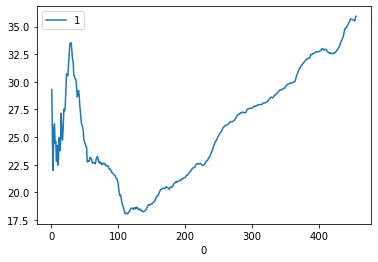

In [14]:
MSE_DF.plot()

In [15]:
algo2 = KNeighborsRegressor(n_neighbors=114)
algo2.fit(X_train, y_train)
algo2.predict(X_test)

array([15.87631579, 15.87631579, 16.12807018, 18.86052632, 16.00087719,
       18.73859649, 18.86052632, 18.86052632, 18.86578947, 17.21052632,
       15.87631579, 17.00789474, 18.58157895, 18.89298246, 18.78245614,
       18.86052632, 18.85877193, 18.86140351, 17.51578947, 16.74122807,
       18.78245614, 17.24736842, 18.73859649, 18.73859649, 18.86578947,
       18.79385965, 18.85877193, 18.77894737, 18.42982456, 18.57631579,
       18.73859649, 18.75263158, 17.72192982, 16.74122807, 16.62105263,
       17.72192982, 17.97192982, 23.3754386 , 23.69298246, 23.20789474,
       22.62368421, 23.38684211, 23.41754386, 23.31315789, 22.93947368,
       25.74736842, 25.36140351, 24.85      , 24.70350877, 25.13070175])

In [16]:
k_MSE_tuples

[(1, 29.299199999999992),
 (2, 24.532349999999994),
 (3, 22.003244444444434),
 (4, 25.753774999999997),
 (5, 26.199511999999995),
 (6, 24.440900000000003),
 (7, 24.614844897959188),
 (8, 22.819918750000003),
 (9, 24.265634567901234),
 (10, 22.466314),
 (11, 23.035611570247937),
 (12, 24.952604166666674),
 (13, 23.773740828402374),
 (14, 24.387815306122455),
 (15, 27.16195644444445),
 (16, 25.310738281249996),
 (17, 24.742864359861592),
 (18, 25.761079629629627),
 (19, 27.536523545706363),
 (20, 27.362319),
 (21, 27.636767346938765),
 (22, 29.08414545454545),
 (23, 30.72338071833648),
 (24, 30.59721354166666),
 (25, 30.55123424),
 (26, 31.484486390532542),
 (27, 32.280383813443066),
 (28, 33.466578826530615),
 (29, 33.51196837098692),
 (30, 33.53000133333333),
 (31, 32.78647221644121),
 (32, 32.042155859375),
 (33, 31.766151515151513),
 (34, 30.539863840830446),
 (35, 30.5083386122449),
 (36, 30.227788580246916),
 (37, 30.199297297297303),
 (38, 29.615180332409977),
 (39, 28.64333767258

In [17]:
predictions

array([22.94100877, 22.94100877, 22.94100877, 22.94100877, 22.94100877,
       22.94100877, 22.94100877, 22.94100877, 22.94100877, 22.94100877,
       22.94100877, 22.94100877, 22.94100877, 22.94100877, 22.94100877,
       22.94100877, 22.94100877, 22.94100877, 22.94100877, 22.94100877,
       22.94100877, 22.94100877, 22.94100877, 22.94100877, 22.94100877,
       22.94100877, 22.94100877, 22.94100877, 22.94100877, 22.94100877,
       22.94100877, 22.94100877, 22.94100877, 22.94100877, 22.94100877,
       22.94100877, 22.94100877, 22.94100877, 22.94100877, 22.94100877,
       22.94100877, 22.94100877, 22.94100877, 22.94100877, 22.94100877,
       22.94100877, 22.94100877, 22.94100877, 22.94100877, 22.94100877])

In [18]:
lowest_MSE = None


for each_tuple in k_MSE_tuples:
    if lowest_MSE is None:
        best_k     = each_tuple[0]
        lowest_MSE = each_tuple[1]
    else:
        if each_tuple[1] < lowest_MSE:
            best_k = each_tuple[0]
            lowest_MSE = each_tuple[1]

# Print the best MSE and k

print( "Lowest MSE for Boston dataset using k-nearest neighbors is %s, with k as %s." \
      "\n(Considering k-values in the range of 1 to %s)" % (lowest_MSE, best_k, k_list[-1]))

# print "MSE for Boston Dataset using Linear Regression is" , lowest_MSE

Lowest MSE for Boston dataset using k-nearest neighbors is 18.06311312711603, with k as 114.
(Considering k-values in the range of 1 to 456)


#### compare with linear regression

In [19]:
import pandas as pd
import sklearn as sk
from sklearn import linear_model


In [20]:
df = pd.read_csv(r'C:\Users\home\Desktop\Machine Learning\datasets\boston.csv')

print(df.shape)
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\home\\Desktop\\Machine Learning\\datasets\\boston.csv'

In [27]:
algo = linear_model.LinearRegression()

In [28]:
cols = df.columns.tolist()

X = df[cols[:-1]]
y = df[cols[-1]]

X_train = X.iloc[:(len(df)-50),]
y_train = y.iloc[:(len(df)-50),]

X_test = X.iloc[(len(df)-50):,]
y_test = y.iloc[(len(df)-50):,]

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(456, 13) (456,) (50, 13) (50,)


In [29]:
algo.fit (X_train, y_train)
predictions = algo.predict(X_test)

MSE = sk.metrics.mean_squared_error(y_test, predictions)

print ("MSE for Boston dataset using linear regression is" , MSE)

MSE for Boston dataset using linear regression is 10.96041067942268


# We see that for this particular dataset, linear regression  outperforms k-nearest neighbors.